## 0. Preprocessing

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
data = arff.loadarff('4year.arff')
df = pd.DataFrame(data[0])

In [3]:
df['bankruptcy'] = (df['class']==b'1')
del df['class']
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']

In [5]:
df.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankruptcy
0,0.159290,0.46240,0.07773,1.1683,-44.853,0.467020,0.189480,0.82895,1.1223,0.38330,...,0.108990,0.41557,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.0560,False
1,-0.127430,0.46243,0.26917,1.7517,7.597,0.000925,-0.127430,1.16250,1.2944,0.53757,...,-0.089372,-0.23704,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.4725,False
2,0.070488,0.23570,0.52781,3.2393,125.680,0.163670,0.086895,2.87180,1.0574,0.67689,...,0.054286,0.10413,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.7818,False
3,0.136760,0.40538,0.31543,1.8705,19.115,0.504970,0.136760,1.45390,1.1144,0.58938,...,0.102630,0.23203,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.6484,False
4,-0.110080,0.69793,0.18878,1.2713,-15.344,0.000000,-0.110080,0.43282,1.7350,0.30207,...,0.439880,-0.36440,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.0360,False


In [6]:
df.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [7]:
sum(df.bankruptcy == True)

515

In [8]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp_mean.fit_transform(df.values)

In [9]:
from sklearn.model_selection import train_test_split

X, y = X_imp[:, :-1], X_imp[:, -1]

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [10]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## 1. Select the 2 most important features using LogisticRegression with L1 penalty. (Adjust C until you see 2 features)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
#Find the 2 most important features (Use the for-loop to try different C_values until 2 coef_s != 0)
C_values = [i / 1000.0 for i in range(1, 100)]
non_zero_num = []   #an empty list to save the numbers of coef_ != 0 for each C

In [13]:
for C_value in C_values:
    lr = LogisticRegression(penalty='l1', C=C_value, solver='liblinear')   #Remember to set the solver parameter!! 
    lr.fit(X_train_std, y_train)
    #num = lr.coef_[lr.coef_!=0].shape
    num = len(lr.coef_[lr.coef_!=0])
    non_zero_num.append([C_value, num])

In [14]:
non_zero_num

[[0.001, 0],
 [0.002, 0],
 [0.003, 0],
 [0.004, 0],
 [0.005, 0],
 [0.006, 0],
 [0.007, 1],
 [0.008, 1],
 [0.009, 1],
 [0.01, 2],
 [0.011, 2],
 [0.012, 2],
 [0.013, 3],
 [0.014, 5],
 [0.015, 7],
 [0.016, 7],
 [0.017, 7],
 [0.018, 7],
 [0.019, 7],
 [0.02, 7],
 [0.021, 7],
 [0.022, 6],
 [0.023, 6],
 [0.024, 6],
 [0.025, 6],
 [0.026, 6],
 [0.027, 6],
 [0.028, 6],
 [0.029, 7],
 [0.03, 7],
 [0.031, 7],
 [0.032, 7],
 [0.033, 7],
 [0.034, 7],
 [0.035, 7],
 [0.036, 7],
 [0.037, 7],
 [0.038, 7],
 [0.039, 7],
 [0.04, 7],
 [0.041, 8],
 [0.042, 8],
 [0.043, 8],
 [0.044, 8],
 [0.045, 8],
 [0.046, 8],
 [0.047, 8],
 [0.048, 8],
 [0.049, 8],
 [0.05, 8],
 [0.051, 8],
 [0.052, 8],
 [0.053, 8],
 [0.054, 8],
 [0.055, 9],
 [0.056, 9],
 [0.057, 9],
 [0.058, 9],
 [0.059, 9],
 [0.06, 9],
 [0.061, 9],
 [0.062, 9],
 [0.063, 9],
 [0.064, 9],
 [0.065, 9],
 [0.066, 10],
 [0.067, 10],
 [0.068, 10],
 [0.069, 10],
 [0.07, 10],
 [0.071, 11],
 [0.072, 11],
 [0.073, 12],
 [0.074, 12],
 [0.075, 12],
 [0.076, 12],
 [0.077,

In [15]:
#from the non_zero_num, we can get when C = 0.01/0.011/0.012 we can see 2 features
#then set C = 0.01
lr = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')
lr.fit(X_train_std, y_train)
#get the index of non-zero features
feature_idx = np.argwhere(lr.coef_.squeeze() != 0).squeeze()
feature_idx

array([ 0, 37], dtype=int64)

In [16]:
features = list(np.array(df.columns)[feature_idx])
features

['X01', 'X38']

In [17]:
print('The 2 most important features are {0}.'.format(features))

The 2 most important features are ['X01', 'X38'].


In [18]:
# redefine X_train_std and X_test_std
X_train_std = X_train_std[:, lr.coef_[0]!=0]
X_test_std = X_test_std[:, lr.coef_[0]!=0]

## 2. Using the 2 selected features, apply LR / SVM / decision tree. Try your own hyperparameters to maximize the prediction accuracy. 

### 2.1 LR

In [19]:
C_values = [i / 10000. for i in range(100, 121, 4)]
C_values

[0.01, 0.0104, 0.0108, 0.0112, 0.0116, 0.012]

In [20]:
#Try different C_value and calc the accuracy
for i in range(len(C_values)):
    lr = LogisticRegression(penalty='l1', C=C_values[i], solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('Round #{0}: C = {1},'.format(i, C_values[i]))
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test), '\n')

Round #0: C = 0.01,
Training accuracy: 0.9474759264662971
Test accuracy: 0.9469026548672567 

Round #1: C = 0.0104,
Training accuracy: 0.9476218266705574
Test accuracy: 0.9469026548672567 

Round #2: C = 0.0108,
Training accuracy: 0.9476218266705574
Test accuracy: 0.9469026548672567 

Round #3: C = 0.0112,
Training accuracy: 0.9476218266705574
Test accuracy: 0.9469026548672567 

Round #4: C = 0.0116,
Training accuracy: 0.9476218266705574
Test accuracy: 0.9469026548672567 

Round #5: C = 0.012,
Training accuracy: 0.9476218266705574
Test accuracy: 0.9469026548672567 



### 2.2 SVM

In [21]:
from sklearn.svm import SVC
gamma_list = [0.1, 0.3, 0.5, 0.7, 0.9]

In [22]:
for i in range(len(gamma_list)):
    svm = SVC(kernel='rbf', C=1.0, gamma=gamma_list[i])
    svm.fit(X_train_std, y_train)
    print('Round #{0}: gamma = {1},'.format(i, gamma_list[i]))
    print('Training accuracy:', svm.score(X_train_std, y_train))
    print('Test accuracy:', svm.score(X_test_std, y_test), '\n')

Round #0: gamma = 0.1,
Training accuracy: 0.9477677268748176
Test accuracy: 0.9472430224642614 

Round #1: gamma = 0.3,
Training accuracy: 0.9482054274875985
Test accuracy: 0.9472430224642614 

Round #2: gamma = 0.5,
Training accuracy: 0.9482054274875985
Test accuracy: 0.9472430224642614 

Round #3: gamma = 0.7,
Training accuracy: 0.9482054274875985
Test accuracy: 0.9472430224642614 

Round #4: gamma = 0.9,
Training accuracy: 0.9482054274875985
Test accuracy: 0.9472430224642614 



### 2.3 Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree_depth_list = list(range(3, 8))

In [24]:
for i in range(len(tree_depth_list)):
    tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=tree_depth_list[i])
    tree_clf.fit(X_train_std, y_train)
    print('Round #{0}: tree_depth = {1},'.format(i, tree_depth_list[i]))
    print('Training accuracy:', tree_clf.score(X_train_std, y_train))
    print('Test accuracy:', tree_clf.score(X_test_std, y_test), '\n')

Round #0: tree_depth = 3,
Training accuracy: 0.9477677268748176
Test accuracy: 0.9462219196732471 

Round #1: tree_depth = 4,
Training accuracy: 0.948497227896119
Test accuracy: 0.9455411844792376 

Round #2: tree_depth = 5,
Training accuracy: 0.9492267289174204
Test accuracy: 0.9452008168822328 

Round #3: tree_depth = 6,
Training accuracy: 0.9501021301429822
Test accuracy: 0.944860449285228 

Round #4: tree_depth = 7,
Training accuracy: 0.9509775313685439
Test accuracy: 0.9441797140912185 



## 3. Visualize the classification

In [25]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [26]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

### 3.1 LR

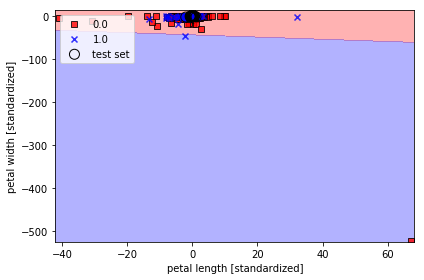

In [27]:
lr = LogisticRegression(penalty='l1', C=0.011, solver='liblinear')
lr.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

### 3.2 SVM

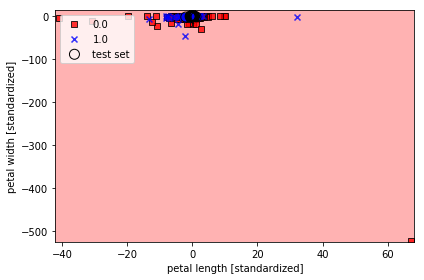

In [28]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

### 3.3 Decision Tree

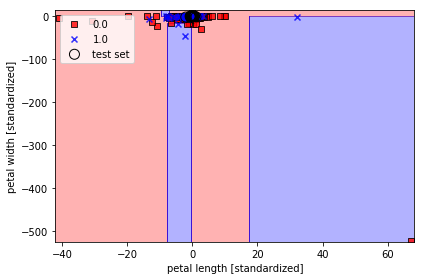

In [31]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=tree_clf, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()